### Linear Regression Algorithm

In [23]:
import pandas as pd
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
target_col = 'medv'
X = df.drop(columns=[target_col])
y = df[target_col]

In [8]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [10]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.30,random_state=42)

In [11]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
#  scaler.inverse_transform() 

In [17]:
from sklearn.linear_model import LinearRegression
## cross validation

from sklearn.model_selection import cross_val_score

In [26]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
mse = cross_val_score(regression, X_train,y_train,scoring='neg_mean_squared_error', cv =10)

In [28]:
np.mean(mse)

-26.843696809311478

In [29]:
## predication 
reg_pred = regression.predict(X_test)

In [30]:
reg_pred

array([27.6044582 , 36.13782505, 17.69219527, 25.47225984, 18.5826659 ,
       23.3452205 , 17.58616947, 15.67793578, 21.77080011, 20.28616494,
       25.32342898, 19.12549622, -6.48945175, 22.74271293, 17.84417808,
       26.48472147, 19.09439798,  5.08150302, 40.48665475, 17.20820455,
       26.72800089, 29.08885824, 10.99940021, 23.83280829, 16.82307007,
       14.1061069 , 23.2257152 , 14.77065842, 22.79843341, 18.91272099,
       20.57964572, 24.69705617, 25.96499366, 15.42865053, 16.18306171,
       17.50166879, 31.36415341, 19.05301647, 24.95146174, 25.58964026,
       13.96666622, 29.66332405, 42.05665506, 17.7549447 , 26.57609443,
       15.7422761 , 12.99546022, 26.96358183, 19.76386244, 29.76131623,
       21.26359435, 33.98900314, 15.75891889, 25.97510358, 39.56977414,
       22.70167518, 18.24047185, 30.86858554, 24.90516188, 12.73255908,
       22.9305001 , 30.10185541, 31.10238678, 15.23660594, 21.80578338,
       16.8380212 , 20.08657225, 25.41271259, 29.28926744, 11.06

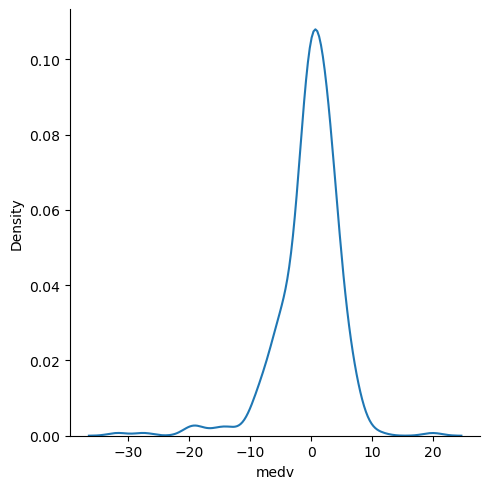

In [32]:
import seaborn as sns
sns.displot(reg_pred - y_test, kind = 'kde')

In [33]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(reg_pred,y_test)

In [35]:
score

0.6360731788570332